In [1]:
import numpy as np
import h5py
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file_name = "/data/lisa/data/genomics/TCGA/gbm.hdf5"
data = h5py.File(file_name, 'r')

In [3]:
# Our key:
print data.keys()

[u'expression_data', u'gene_names', u'graph_data', u'labels_data', u'sample_names']


In [4]:
# Examples:

for k in data.keys():
    print "For {}, shape: {}, ex: {}".format(k, data[k].shape, data[k][0])


For expression_data, shape: (440, 2001), ex: [-1.43741541  0.17275435  0.36723734 ..., -1.14104879 -0.81210058
  0.47840088]
For gene_names, shape: (2001,), ex: EFEMP2
For graph_data, shape: (2001, 2001), ex: [ 0.  0.  0. ...,  0.  0.  0.]
For labels_data, shape: (440,), ex: 0
For sample_names, shape: (525,), ex: TCGA.02.0001.01C


In [5]:
dict(data['labels_data'].attrs)
nb_edges = (np.array(data['graph_data']) > 0.00).sum(axis=0)
nb_1_hop_edges = np.array(data['graph_data']).dot(np.array(data['graph_data']))
print (np.array(data['graph_data']) > 0.00).sum(axis=0)

[3 1 0 ..., 1 4 0]


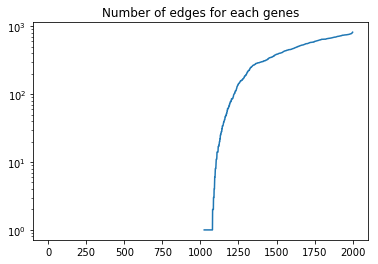

On average: 185.978010995


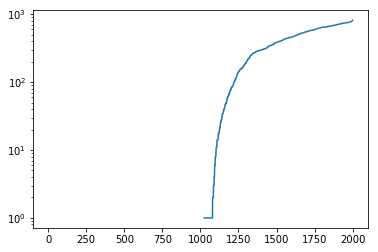

On average: 185.978010995


In [6]:
nb_edges = (np.array(data['graph_data']) > 0.00).sum(axis=0)
nb_1_hop_edges = (np.array(data['graph_data']).dot(np.array(data['graph_data']))> 0.00).sum(axis=0)
nb_2_hop_edges = (np.array(data['graph_data']).dot(np.array(data['graph_data'])).dot(np.array(data['graph_data']))> 0.00).sum(axis=0)

nb_edges = nb_2_hop_edges

plt.semilogy(np.sort(nb_edges))
plt.title("Number of edges for each genes")
plt.show()
print "On average: {}".format(nb_edges.mean(axis=0))

plt.semilogy(np.sort(nb_edges))
plt.show()
print "On average: {}".format(nb_edges.mean(axis=0))

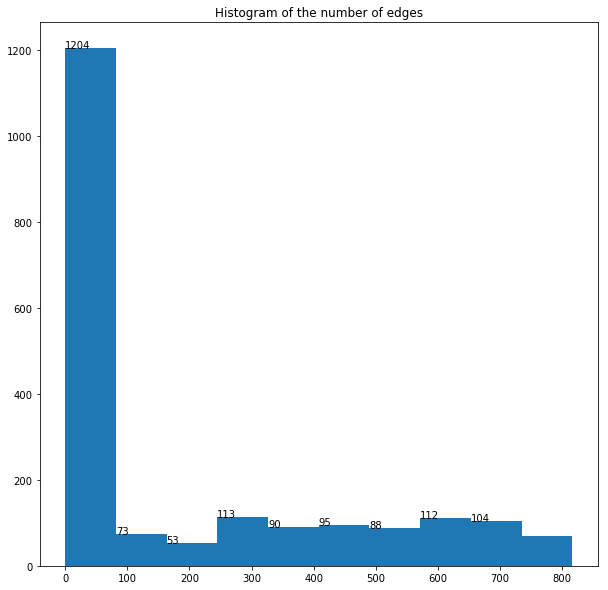

[1025   55    6    4    3    1    3    1    4    1]


In [35]:
# The histogram of edges
nb_edges = (np.array(data['graph_data']) > 0.00).sum(axis=0)
nb_1_hop_edges = (np.array(data['graph_data']).dot(np.array(data['graph_data']))> 0.00).sum(axis=0)
nb_2_hop_edges = (np.array(data['graph_data']).dot(np.array(data['graph_data'])).dot(np.array(data['graph_data']))> 0.00).sum(axis=0)

nb_edges = nb_2_hop_edges

max_show = 2000
my_bins =  range(max_show)

plt.figure(figsize=(10,10))
arr = plt.hist(np.minimum(nb_edges, max_show))#[0, 2, 5, 10, 100, 1000])

for i in range(0, 9, 1):
    plt.text(arr[1][i], arr[0][i], str(int(arr[0][i])))
    
plt.title("Histogram of the number of edges")
plt.show()

    
print np.histogram(np.minimum(nb_edges, max_show), range(max_show))[0][:10]
# If we compare to an image, the number of neighbors is = filter_size **2 (i.e. usually 4, 9, 25)

In [45]:
#a = (np.array(data['graph_data']) > 0.00).sum(axis=0)
#a = (np.array(data['graph_data']).dot(np.array(data['graph_data']))> 0.00).sum(axis=0)
a = (np.array(data['graph_data']).dot(np.array(data['graph_data'])).dot(np.array(data['graph_data']))> 0.00).sum(axis=0)

arg_a = np.argsort(a)
for i in list(reversed(arg_a[-10:])):
    print "{}: {} edges.".format(data['gene_names'][i], a[i]) 

print "..."

for i in arg_a[:10]:
    print "{}: {} edges.".format(data['gene_names'][i], a[i]) 

STAT3: 816 edges.
MYC: 808 edges.
CALM1: 807 edges.
HSPA5: 797 edges.
LMNA: 793 edges.
HSPB1: 792 edges.
MAPK8: 785 edges.
TRIM21: 784 edges.
IQGAP1: 779 edges.
LIMS1: 778 edges.
...
GPR32: 0 edges.
ACAA1: 0 edges.
CPD: 0 edges.
C1QL1: 0 edges.
FAM3C: 0 edges.
TADA3L: 0 edges.
IMPACT: 0 edges.
ABCA7: 0 edges.
CAP2: 0 edges.
MGAT4B: 0 edges.
